In [45]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
# Step 1: Load the California Housing Dataset
#import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd

#load the California Housing dataset
california = fetch_california_housing()

#split the data into features (X) and target(y)
X = pd.DataFrame(california.data, columns=california.feature_names) #feature variables
y = pd.Series(california.target) #Target variable(house prices)

#Check the shape of the data
print("Feature data shape:", X.shape)
print("Target data shape:", y.shape)

#Display the first few rows of the dataset
print(X.head())
print(y.head())

Feature data shape: (20640, 8)
Target data shape: (20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


Optimal parameters (theta): [0.45085577 0.41793849]
Mean Squared Error (MSE): 0.7011311502929527


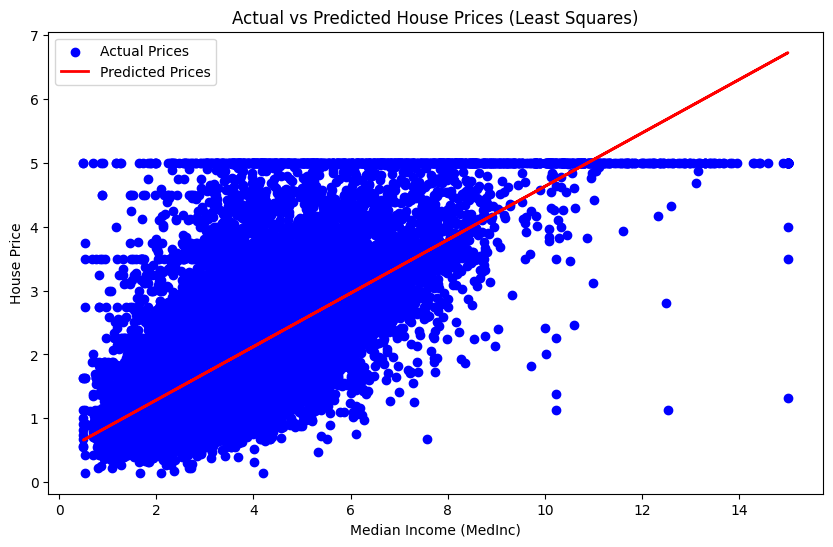

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Use 'MedInc' (Median Income) as the feature for single-variable regression.
X = X[['MedInc']]

# Step 2: Add a bias (intercept) term to the features
# We add a column of ones to X to account for the intercept term in the linear model
# Please use the np.c_ function to add a column to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # np.c_ is used to concatenate ones column to X

# Step 3
# Please use the np.linalg.inv function to calculate an inverse matrix
# θ = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Step 4: Make predictions
# Please use 'dot' operation
y_pred = np.dot(X_b, theta_best)

# Step 5
mse = mean_squared_error(y, y_pred)

# Step 6: Print the results
print("Optimal parameters (theta):", theta_best)
print("Mean Squared Error (MSE):", mse)

# Step 7: Visualize the results (Actual vs Predicted values)
# Please use a Scatter plot for actual values (e.g., plt.scatter)
# Please use a line plot for predicted values (e.g., plt.plot)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred, color='red', label='Predicted Prices', linewidth=2)
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price')
plt.legend()
plt.title('Actual vs Predicted House Prices (Least Squares)')
# Show the plot
plt.show()